In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import json

In [2]:
# Save config information.
api_key = "3bbb59b9e1903c30dafd32e52ec1e530"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=3bbb59b9e1903c30dafd32e52ec1e530&units=metric&q='

In [3]:
weather_data = []
cities = ["Paris","London","Oslo","Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_data.append(response)

In [4]:
for x in weather_data:
    print(json.dumps(x, indent=3))

{
   "coord": {
      "lon": 2.35,
      "lat": 48.85
   },
   "weather": [
      {
         "id": 804,
         "main": "Clouds",
         "description": "overcast clouds",
         "icon": "04n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 5.86,
      "pressure": 1023,
      "humidity": 75,
      "temp_min": 5,
      "temp_max": 7
   },
   "visibility": 10000,
   "wind": {
      "speed": 2.1,
      "deg": 340
   },
   "clouds": {
      "all": 90
   },
   "dt": 1510189200,
   "sys": {
      "type": 1,
      "id": 5617,
      "message": 0.1662,
      "country": "FR",
      "sunrise": 1510210222,
      "sunset": 1510244270
   },
   "id": 2988507,
   "name": "Paris",
   "cod": 200
}
{
   "coord": {
      "lon": -0.13,
      "lat": 51.51
   },
   "weather": [
      {
         "id": 801,
         "main": "Clouds",
         "description": "few clouds",
         "icon": "02n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 2.12,
      "pressure": 1025,
    

In [6]:
# Extract interesting data from responses
lat_data = [data.get("coord").get("lat") for data in weather_data]
temp_data = [data.get("main").get("temp") for data in weather_data]

weather_data = {"temp": temp_data, "lat": lat_data}
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,lat,temp
0,48.85,6.43
1,51.51,5.30
2,59.91,8.00
3,39.91,2.00


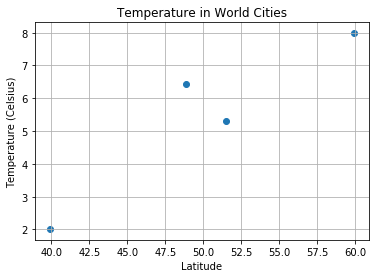

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

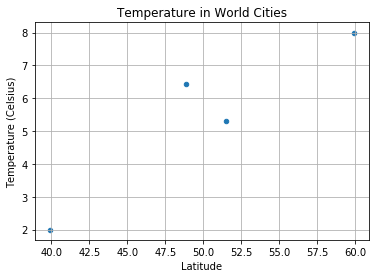

In [8]:
# Creating with pandas plot
weather_plot = weather_data.plot(kind="scatter", x="lat", y="temp")
weather_plot.set_xlabel("Latitude")
weather_plot.set_ylabel("Temperature (Celsius)")
weather_plot.set_title("Temperature in World Cities")
plt.grid(True)

plt.show()